In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/CODSOFT/Churn_Modelling.csv')

In [3]:
# Display information about the dataset
print("Dataset Description:")
print(dataset.describe())

Dataset Description:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min 

In [4]:
print("\nDataset Head:")
print(dataset.head())


Dataset Head:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0 

In [5]:
print("\nDataset Column Info:")
print(dataset.info())


Dataset Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [6]:
# Drop unnecessary columns
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


In [7]:
# One-hot encode categorical variables
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [8]:
# Display unique values in the 'Gender' column if it exists
if 'Gender' in dataset.columns:
    print("\nUnique values in 'Gender' column:")
    print(dataset['Gender'].unique())

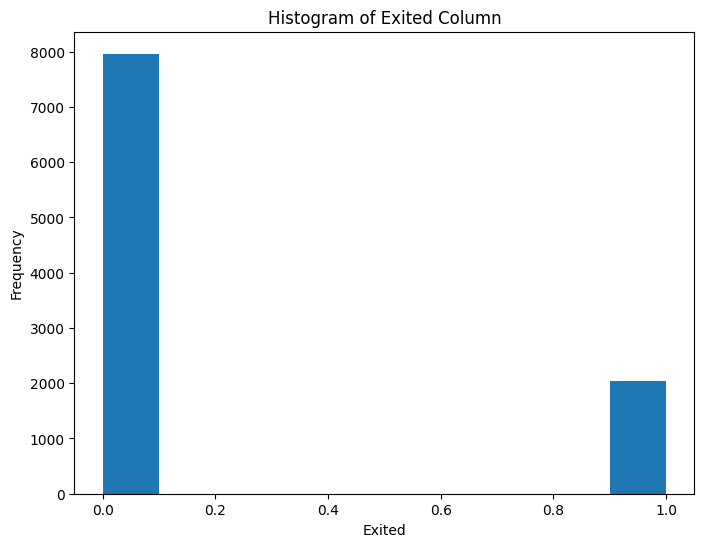

In [9]:
# Plot histogram of the 'Exited' column
plt.figure(figsize=(8, 6))
plt.hist(dataset['Exited'])
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.title('Histogram of Exited Column')
plt.show()

In [10]:
# Calculate the number of customers who exited
num_exited = (dataset['Exited'] == 1).sum()
print("\nNumber of customers who exited:", num_exited)


Number of customers who exited: 2037


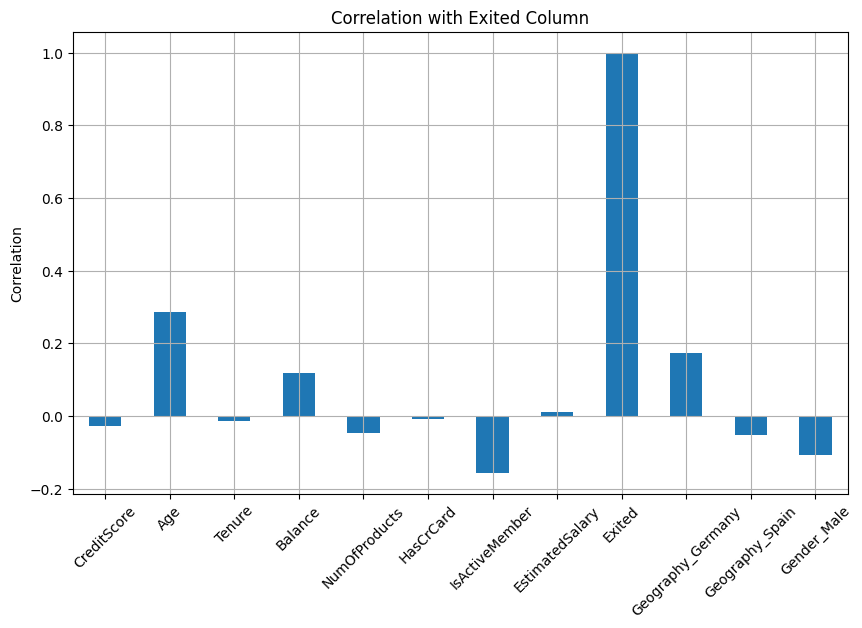

In [11]:
# Correlation with the 'Exited' column
corr_with_exited = dataset.corrwith(dataset['Exited'])
corr_with_exited.plot.bar(figsize=(10, 6), title='Correlation with Exited Column', rot=45)
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

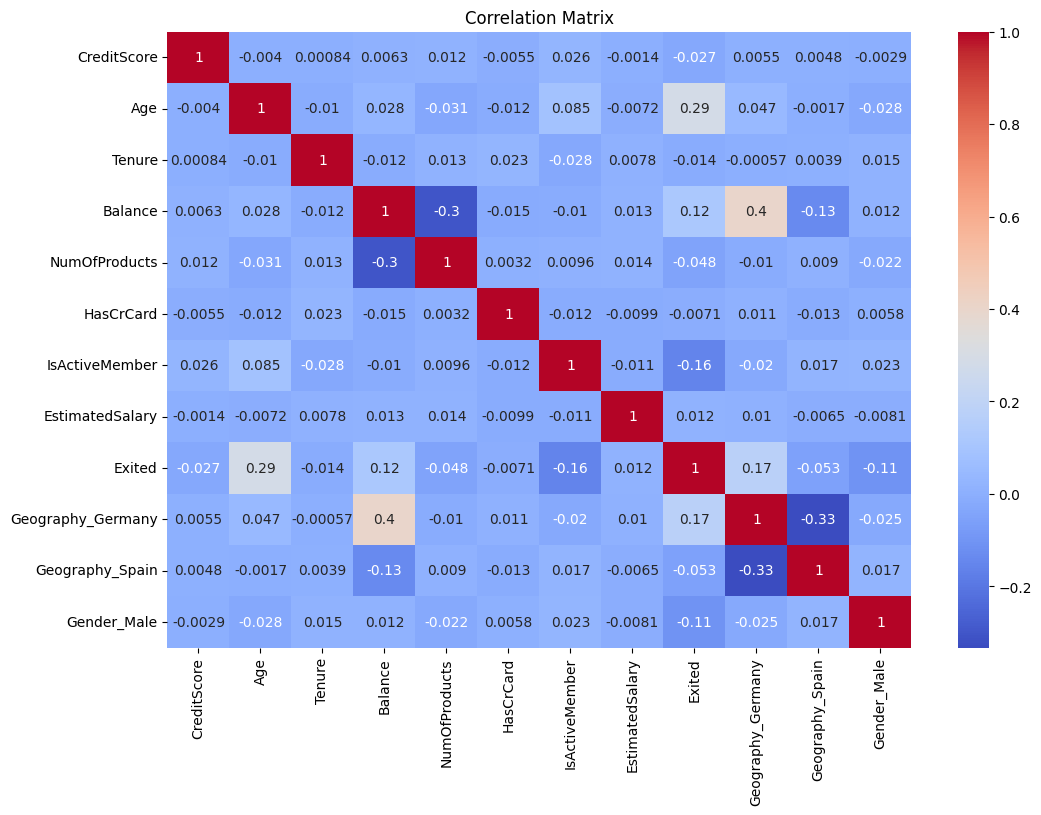

In [12]:
# Calculate correlation matrix
corr_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Prepare data for modeling
X = dataset.drop(columns='Exited')
y = dataset['Exited']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Train and predict using Logistic Regression
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

# Train and predict using Random Forest
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# Train and predict using Gradient Boosting
clf_gb = GradientBoostingClassifier(random_state=0)
clf_gb.fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)


In [15]:
# Evaluate models
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    return pd.DataFrame([[name, acc, f1, prec, rec]], columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

# Evaluate Logistic Regression
results_lr = evaluate_model('Logistic Regression', y_test, y_pred_lr)

# Evaluate Random Forest
results_rf = evaluate_model('Random Forest', y_test, y_pred_rf)

# Evaluate Gradient Boosting
results_gb = evaluate_model('Gradient Boosting', y_test, y_pred_gb)

# Combine results into a DataFrame
results = pd.concat([results_lr, results_rf, results_gb], ignore_index=True)
print("\nModel Evaluation Results:")
print(results)

# Confusion matrix for Logistic Regression
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

# Confusion matrix for Random Forest
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Confusion matrix for Gradient Boosting
print("\nConfusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))


Model Evaluation Results:
                 Model  Accuracy        F1  Precision    Recall
0  Logistic Regression     0.811  0.336842   0.581818  0.237037
1        Random Forest     0.867  0.613372   0.745583  0.520988
2    Gradient Boosting     0.867  0.613372   0.745583  0.520988

Confusion Matrix for Logistic Regression:
[[1526   69]
 [ 309   96]]

Confusion Matrix for Random Forest:
[[1523   72]
 [ 194  211]]

Confusion Matrix for Gradient Boosting:
[[1523   72]
 [ 194  211]]
